<a href="https://colab.research.google.com/github/SethSekyere/SethMLClass/blob/main/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Machine Learning Engineering
##Homework 3
##Seth Sekyere
##RIN:662055184

##Problem 1

Saving seg2.jpg to seg2 (3).jpg


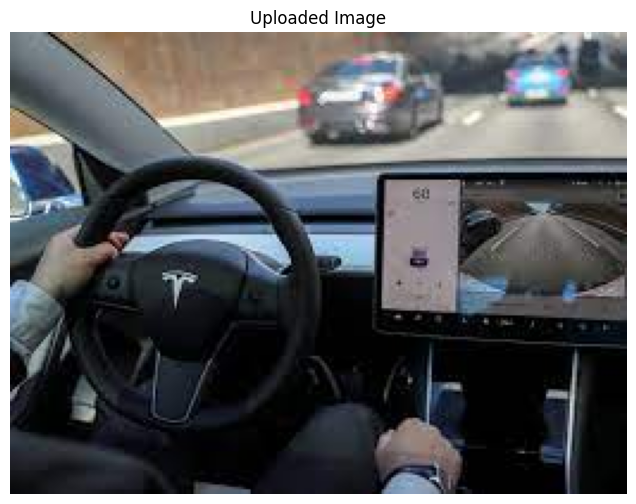

In [85]:
from google.colab import files
import matplotlib.pyplot as plt
import numpy as np
from skimage.segmentation import slic
import cv2
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# Uploading the image file
uploaded = files.upload()

# Loading the image
for filename in uploaded.keys():
    image = io.imread(filename)

# Displaying the image
plt.figure(figsize=(8, 6))
plt.imshow(image)
plt.title('Uploaded Image')
plt.axis('off')
plt.show()


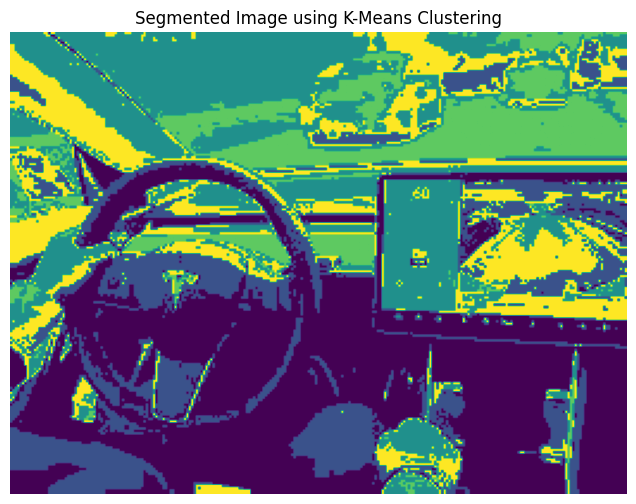

In [94]:
# Converting to RGB format
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Reshaping the image for k-means clustering
pixel_vals = image.reshape((-1, 3))
pixel_vals = np.float32(pixel_vals)

# Setting the number of clusters
num_clusters = 5

# Applying k-means clustering
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
_, labels, centers = cv2.kmeans(pixel_vals, num_clusters, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Reshaping the labels back to the original image shape
segmented_image = labels.reshape(image.shape[:2])

# Visualizing the segmented image
plt.figure(figsize=(8, 6))
plt.imshow(segmented_image, cmap='viridis')
plt.axis('off')
plt.title("Segmented Image using K-Means Clustering")
plt.show()







When I changed the number of clusters to 2, it was difficult to actually see the image quite expressly. Using cluster number higher than 2 was quite okay until 5. However more than 5 produced a badly defined image.
I checked the silhoutte score using the hints from lecture 9-11.
I plotted them and decided to use 5 so it could give a quite well defined image and quite good silhouette score of about 0.5 to 0.6.

##Problem 2



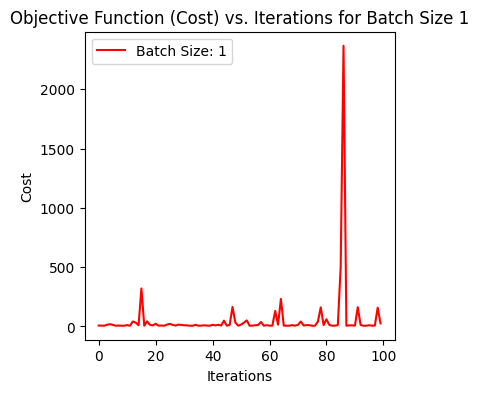

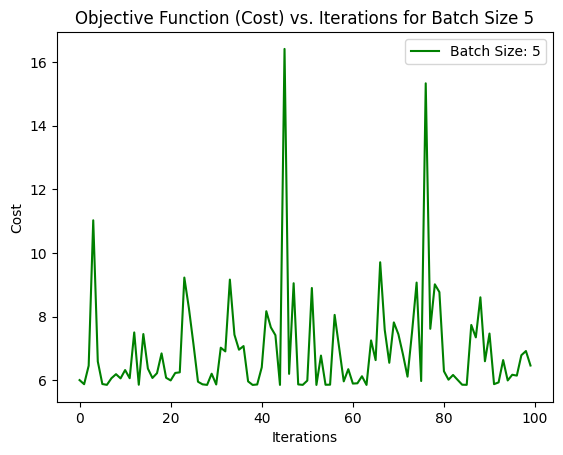

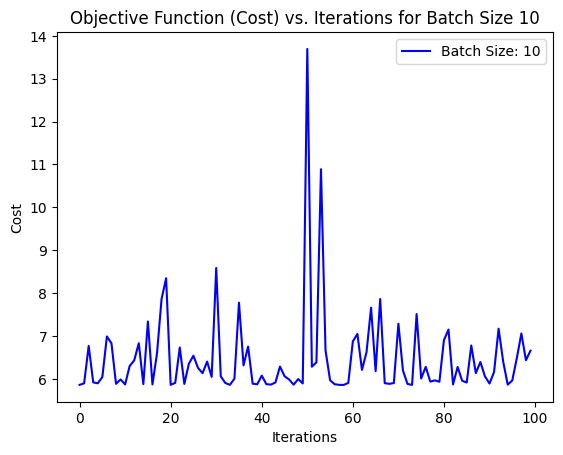

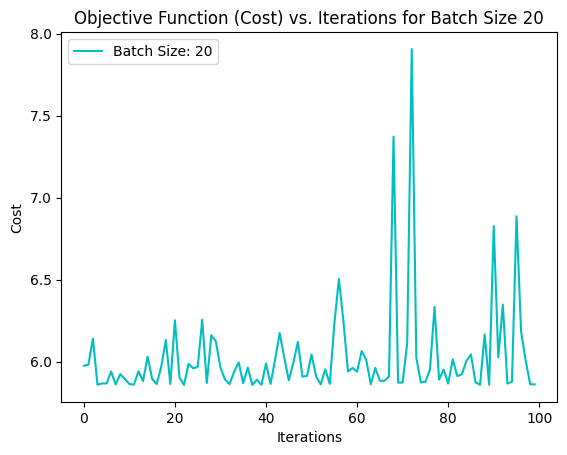

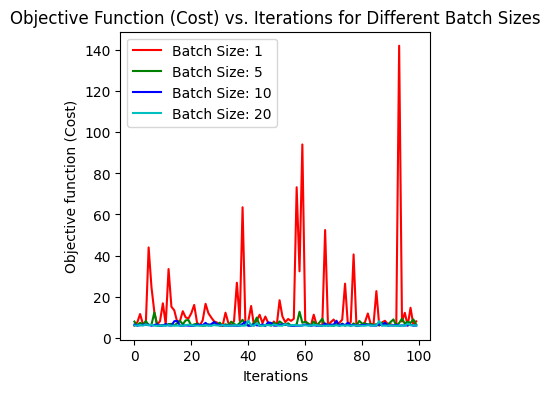

Predicted price of a house with population of 160,000: $118944.30


In [139]:
import numpy as np
import matplotlib.pyplot as plt

#   Loading the data
data = """
6.1101,17.592
5.5277,9.1302
8.5186,13.662
7.0032,11.854
5.8598,6.8233
8.3829,11.886
7.4764,4.3483
8.5781,12
6.4862,6.5987
5.0546,3.8166
5.7107,3.2522
14.164,15.505
5.734,3.1551
8.4084,7.2258
5.6407,0.71618
5.3794,3.5129
6.3654,5.3048
5.1301,0.56077
6.4296,3.6518
7.0708,5.3893
6.1891,3.1386
20.27,21.767
5.4901,4.263
6.3261,5.1875
5.5649,3.0825
18.945,22.638
12.828,13.501
10.957,7.0467
13.176,14.692
22.203,24.147
5.2524,-1.22
6.5894,5.9966
9.2482,12.134
5.8918,1.8495
8.2111,6.5426
7.9334,4.5623
8.0959,4.1164
5.6063,3.3928
12.836,10.117
6.3534,5.4974
5.4069,0.55657
6.8825,3.9115
11.708,5.3854
5.7737,2.4406
7.8247,6.7318
7.0931,1.0463
5.0702,5.1337
5.8014,1.844
11.7,8.0043
5.5416,1.0179
7.5402,6.7504
5.3077,1.8396
7.4239,4.2885
7.6031,4.9981
6.3328,1.4233
6.3589,-1.4211
6.2742,2.4756
5.6397,4.6042
9.3102,3.9624
9.4536,5.4141
8.8254,5.1694
5.1793,-0.74279
21.279,17.929
14.908,12.054
18.959,17.054
7.2182,4.8852
8.2951,5.7442
10.236,7.7754
5.4994,1.0173
20.341,20.992
10.136,6.6799
7.3345,4.0259
6.0062,1.2784
7.2259,3.3411
5.0269,-2.6807
6.5479,0.29678
7.5386,3.8845
5.0365,5.7014
10.274,6.7526
5.1077,2.0576
5.7292,0.47953
5.1884,0.20421
6.3557,0.67861
9.7687,7.5435
6.5159,5.3436
8.5172,4.2415
9.1802,6.7981
6.002,0.92695
5.5204,0.152
5.0594,2.8214
5.7077,1.8451
7.6366,4.2959
5.8707,7.2029
5.3054,1.9869
8.2934,0.14454
13.394,9.0551
5.4369,0.61705
"""

data = data.strip().split('\n')
data = [row.split(',') for row in data]
data = np.array(data, dtype=np.float64)

#  Defining the Model
class LinearRegression:
    def __init__(self, lr=0.01):
        self.lr = lr
        self.theta = None

    def fit(self, X, y, batch_size=1, epochs=100):
        m, n = X.shape
        self.theta = np.zeros(n)
        costs = []

        for _ in range(epochs):
            np.random.shuffle(data)
            batches = [data[i:i+batch_size] for i in range(0, m, batch_size)]
            for batch in batches:
                X_batch = batch[:, :-1]
                y_batch = batch[:, -1]
                y_pred = X_batch.dot(self.theta)
                error = y_pred - y_batch
                gradient = X_batch.T.dot(error) / batch_size
                self.theta -= self.lr * gradient
            cost = np.mean((self.predict(X) - y) ** 2) / 2
            costs.append(cost)
        return costs

    def predict(self, X):
        return X.dot(self.theta)

# Training and Plotting
batch_sizes = [1, 5, 10, 20]
colors = ['r', 'g', 'b', 'c']

plt.figure(figsize=(4, 4))
for i, batch_size in enumerate(batch_sizes):
    model = LinearRegression()
    costs = model.fit(data[:, :-1], data[:, -1], batch_size=batch_size)
    plt.plot(costs, label=f'Batch Size: {batch_size}', color=colors[i])

    plt.title(f'Objective Function (Cost) vs. Iterations for Batch Size {batch_size}')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.legend()
    plt.show()

    # Plotting all batches together with a legend
plt.figure(figsize=(4, 4))
for i, batch_size in enumerate(batch_sizes):
    model = LinearRegression()
    costs = model.fit(data[:, :-1], data[:, -1], batch_size=batch_size)
    plt.plot(costs, label=f'Batch Size: {batch_size}', color=colors[i])

plt.title('Objective Function (Cost) vs. Iterations for Different Batch Sizes')
plt.xlabel('Iterations')
plt.ylabel('Objective function (Cost)')
plt.legend()
plt.show()


# Predicting the price of a house with population of 160,000
np.random.seed(42)
population = 160000
price_prediction = model.predict(np.array([[population]]))
print(f"Predicted price of a house with population of 160,000: ${price_prediction[0]:.2f}")

# Training the model
model = LinearRegression()
costs = model.fit(data[:, :-1], data[:, -1], batch_size=1)  # Using a batch size of 1 for simplicity




##Hence the predicted price of a house with population of 160,000 is $118944.30

##When you change the batch size to 1 , Each iteration processes only one data point at a time.
##The model's parameters are updated frequently, leading to rapid adjustments in the direction of the gradient.
##The training process becomes more noisy compared to larger batch sizes because the updates are based on individual data points rather than averaged over a batch. the convergence might be more erratic due to the noisy updates, and the final solution might not be as smooth or stable as with larger batch sizes.
##Hence changing the batch size to 1 would result in more fluctuations in the cost function plot and potentially faster convergence to a local minimum. However, the plot might appear more erratic compared to larger batch sizes.



##Problem 3

Dataset Shape: (569, 30)
Feature Names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Accuracy: 0.9766081871345029
Confusion Matrix:
[[ 61   2]
 [  2 106]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        63
           1       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0

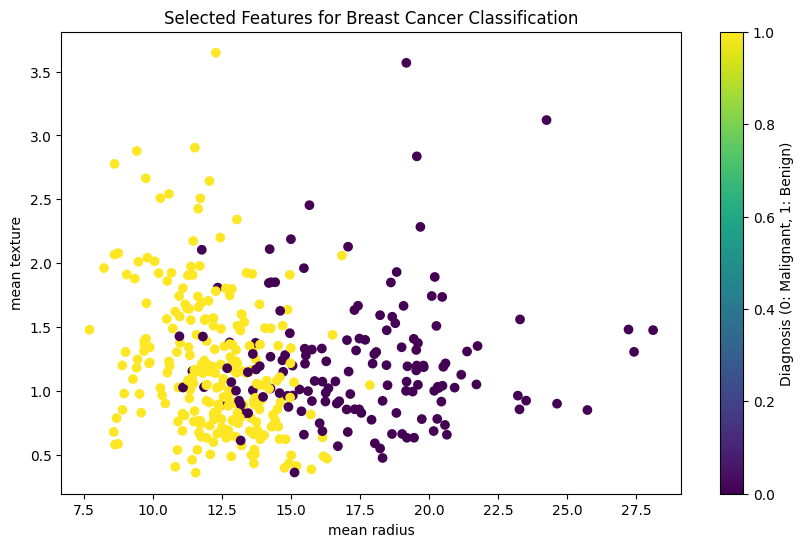

In [156]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#  Loading Breast Cancer Wisconsin (Diagnostic) Dataset
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names

#  Exploring the dataset
print("Dataset Shape:", X.shape)
print("Feature Names:", feature_names)

#  Separating the dataset into training and testing sets (70%-30% split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#  Using  RFECV and Logistic Regression to select the best features
logreg = LogisticRegression(max_iter=10000)
rfecv = RFECV(estimator=logreg, step=1, cv=5)
rfecv.fit(X_train, y_train)

# Training the Logistic Regression model on the selected features
X_train_selected = rfecv.transform(X_train)
X_test_selected = rfecv.transform(X_test)
logreg.fit(X_train_selected, y_train)

#  Evaluating the model using various classification metrics
y_pred = logreg.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

#  Plotting two features selected by RFECV
selected_features_idx = rfecv.support_
selected_feature_names = feature_names[selected_features_idx]


print("Hence the two selected features are Mean Texture and Mean Radius")
selected_feature_names[0] , selected_feature_names[1]


#  indexing the top two features
top_two_features_idx = np.argsort(rfecv.estimator_.coef_[0])[-2:]

# Plotting the selected features
plt.figure(figsize=(10, 6))
plt.scatter(X_train[:, top_two_features_idx[0]], X_train[:, top_two_features_idx[1]], c=y_train, cmap='viridis')
plt.xlabel(selected_feature_names[0])
plt.ylabel(selected_feature_names[1])
plt.title("Selected Features for Breast Cancer Classification")
plt.colorbar(label='Diagnosis (0: Malignant, 1: Benign)')
plt.show()




##The best two features to perform the classification are mean radius and mean texture
# From the code output, we can observe the following findings:

##Accuracy: The accuracy of the Logistic Regression model on the test set is 97.66%.

##Confusion Matrix: The confusion matrix which provides information about the true positive, false positive, true negative, and false negative predictions made by the model is [ 61     2] [  2   106].

##Classification Report: The classification report includes precision, recall, F1-score, and support for each class (malignant and benign).

##These metrics provide insights into how well the model is performing in classifying breast cancers.
##Additionally, the scatter plot of the two selected features which are Mean Texture and Mean radius allows us to visually inspect how well the model is separating the two classes (malignant and benign).








##Problem 4

1/1 [==============================] - 0s 47ms/step


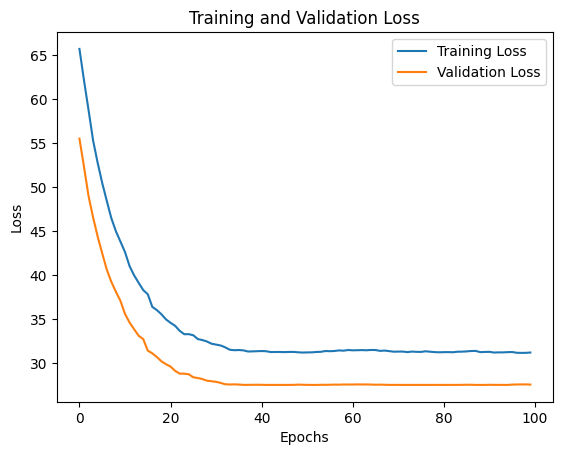

Predicted price for a city with population 165,000: $5.79701042175293
Mean Absolute Error (MAE): $4.016380473917643


In [178]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Provided dataset
population = np.array([6.1101, 5.5277, 8.5186, 7.0032, 5.8598, 8.3829, 7.4764, 8.5781, 6.4862, 5.0546,
                       5.7107, 14.164, 5.734, 8.4084, 5.6407, 5.3794, 6.3654, 5.1301, 6.4296, 7.0708,
                       6.1891, 20.27, 5.4901, 6.3261, 5.5649, 18.945, 12.828, 10.957, 13.176, 22.203,
                       5.2524, 6.5894, 9.2482, 5.8918, 8.2111, 7.9334, 8.0959, 5.6063, 12.836, 6.3534,
                       5.4069, 6.8825, 11.708, 5.7737, 7.8247, 7.0931, 5.0702, 5.8014, 11.7, 5.5416,
                       7.5402, 5.3077, 7.4239, 7.6031, 6.3328, 6.3589, 6.2742, 5.6397, 9.3102, 9.4536,
                       8.8254, 5.1793, 21.279, 14.908, 18.959, 7.2182, 8.2951, 10.236, 5.4994, 20.341,
                       10.136, 7.3345, 6.0062, 7.2259, 5.0269, 6.5479, 7.5386, 5.0365, 10.274, 5.1077,
                       5.7292, 5.1884, 6.3557, 9.7687, 6.5159, 8.5172, 9.1802, 6.002, 5.5204, 5.0594,
                       5.7077, 7.6366, 5.8707, 5.3054, 8.2934, 13.394, 5.4369])

price = np.array([17.592, 9.1302, 13.662, 11.854, 6.8233, 11.886, 4.3483, 12, 6.5987, 3.8166,
                   3.2522, 15.505, 3.1551, 7.2258, 0.71618, 3.5129, 5.3048, 0.56077, 3.6518, 5.3893,
                   3.1386, 21.767, 4.263, 5.1875, 3.0825, 22.638, 13.501, 7.0467, 14.692, 24.147,
                   -1.22, 5.9966, 12.134, 1.8495, 6.5426, 4.5623, 4.1164, 3.3928, 10.117, 5.4974,
                   0.55657, 3.9115, 5.3854, 2.4406, 6.7318, 1.0463, 5.1337, 1.844, 8.0043, 1.0179,
                   6.7504, 1.8396, 4.2885, 4.9981, 1.4233, -1.4211, 2.4756, 4.6042, 3.9624, 5.4141,
                   5.1694, -0.74279, 17.929, 12.054, 17.054, 4.8852, 5.7442, 7.7754, 1.0173, 20.992,
                   6.6799, 4.0259, 1.2784, 3.3411, -2.6807, 0.29678, 3.8845, 5.7014, 6.7526, 2.0576,
                   0.47953, 0.20421, 0.67861, 7.5435, 5.3436, 4.2415, 6.7981, 0.92695, 0.152, 2.8214,
                   1.8451, 4.2959, 7.2029, 1.9869, 0.14454, 9.0551, 0.61705])

# Splitting the data into training and validation sets 70%-30%
X_train, X_val, y_train, y_val = train_test_split(population, price, test_size=0.3, random_state=42)

# Defining the neural network
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=2, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(units=1)  # Output layer
])

# Compiling the model
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)  # Adjust learning rate as needed
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Training the model
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), verbose=0)

# Predicting the price for a city with population 165,000
predicted_price = model.predict(np.array([[16.50]]))  # Converting the population to 10,000s

# Calculate mean absolute error (MAE) as a regression metric
mae = np.mean(np.abs(predicted_price - y_val))

# Plot training and validation losses
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

print(f"Predicted price for a city with population 165,000: ${predicted_price[0][0]}")
print(f"Mean Absolute Error (MAE): ${mae}")


##The predicted cost is  $ 57970.104
##Also a useful regression metric is the mean absolute error which is 4.106

##The training loss decreases with increasing epochs as the model learns from the training data. This decrease indicates that the model is improving its ability to predict the housing prices in this case based on the population.

##Initially, the training loss decreases rapidly as the model quickly learns from the data. As the training progresses, the rate of decrease  slows down.It steadily decreases and converges to a low value, it suggests that the model is learning effectively and fitting the training data well.

##The validation loss measures how well the model generalizes to unseen data data not used during training. It helps us understand whether the model is overfitting or underfitting. the validation loss also decreases initially, indicating that the model is learning to generalize well to the validation data.

##These trends in the plots, can help us make informed decisions about whether the model needs adjustments, such as tuning hyperparameters or changing the model architecture, to improve its performance.